In [19]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
!ls /content/drive/MyDrive/Representation\ Discrimination/data

nonethnic_dataset_100k.joblib


In [21]:
import pandas as pd
import joblib
nonethnic_articles = joblib.load("/content/drive/MyDrive/Representation Discrimination/data/nonethnic_dataset_100k.joblib")
len(nonethnic_articles)

100003

In [22]:
nonethnic_articles[0]

'<p>কার্তিক শেষ হলো কাল। আজ অগ্রহায়ণের প্রথম দিন। শীতের আগমনী বার্তা এখন রাজধানীর আকাশে-বাতাসে। এমন আবহাওয়ায় গতকাল সন্ধ্যায় সেগুনবাগিচার শিল্পকলা একাডেমির জাতীয় নাট্যশালায় মিলনায়তন নিক্বণধ্বনিতে জমে উঠেছিল। এখানে শুরু হয় নয় দিনের দ্বিতীয় জাতীয় নৃত্যনাট্য উৎসব।<br />সোমবার সন্ধ্যায় শিল্পকলা একাডেমির মূল হলে উৎসবের উদ্বোধন করেন অর্থমন্ত্রী আবুল মাল আবদুল মুহিত। অর্থমন্ত্রী সমাজ রক্ষা, উন্নয়ন, মানবিক গুণাবলি বিকাশের জন্যও নৃত্যনাট্য চর্চার গুরুত্ব রয়েছে বলে মন্তব্য করেন। তিনি বলেন, ‘সংস্কৃতির নানা মাধ্যমের মধ্যে নৃত্যনাট্য একটি শক্তিশালী মাধ্যম, যা নানা শিক্ষা দেয়। এই মাধ্যম থেকে রস আস্বাদন করে আমরা সমৃদ্ধ হতে পারি।’<br />অনুষ্ঠানে বিশেষ অতিথির বক্তব্য দেন সংস্কৃতিসচিব আকতারী মমতাজ। আরও বক্তব্য দেন নাট্যব্যক্তিত্ব নাসির উদ্দীন ইউসুফ, প্রবীণ নৃত্যশিল্পী রাহিজা খানম ও বাংলাদেশ নৃত্যশিল্পী সংস্থার সভাপতি মিনু হক। সভাপতিত্ব করেন শিল্পকলা একাডেমির মহাপরিচালক লিয়াকত আলী। রাহিজা খানম সংস্কৃতি খাতে বাজেটের অপ্রতুলতার দিকটি তুলে ধরে বলেন, ‘বাজেটের জন্য আমরা অনেক ভালো কাজ করতে চেয়েও পারি না।’ তার 

### COREX

In [ ]:
!pip install corextopic
!!wget -O stop_words.txt https://raw.githubusercontent.com/aljubaer/Topic-Modeling-in-Bengali/master/code/stop_words.txt


['--2024-08-15 10:24:48--  https://raw.githubusercontent.com/aljubaer/Topic-Modeling-in-Bengali/master/code/stop_words.txt',
 'Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...',
 'Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.',
 'HTTP request sent, awaiting response... 200 OK',
 'Length: 5443 (5.3K) [text/plain]',
 'Saving to: ‘stop_words.txt’',
 '',
 '',
 'stop_words.txt        0%[                    ]       0  --.-KB/s               ',
 'stop_words.txt      100%[===================>]   5.32K  --.-KB/s    in 0s      ',
 '',
 '2024-08-15 10:24:48 (46.2 MB/s) - ‘stop_words.txt’ saved [5443/5443]',
 '']

In [ ]:
stopwords_file = open('stop_words.txt', "r+", encoding='utf-8')
all_stopwords = stopwords_file.read()
stopwords = [word.strip() for word in all_stopwords.split()]
print(stopwords)

['অতএব', 'অথচ', 'অথবা', 'অনুযায়ী', 'অনেক', 'অনেকে', 'অনেকেই', 'অন্তত', 'অন্য', 'অবধি', 'অবশ্য', 'অর্থাত', 'আই', 'আগামী', 'আগে', 'আগেই', 'আছে', 'আজ', 'আদ্যভাগে', 'আপনার', 'আপনি', 'আবার', 'আমরা', 'আমাকে', 'আমাদের', 'আমার', 'আমি', 'আর', 'আরও', 'ই', 'ইত্যাদি', 'ইহা', 'উচিত', 'উত্তর', 'উনি', 'উপর', 'উপরে', 'এ', 'এঁদের', 'এঁরা', 'এই', 'একই', 'একটি', 'একবার', 'একে', 'এক্', 'এখন', 'এখনও', 'এখানে', 'এখানেই', 'এটা', 'এটাই', 'এটি', 'এত', 'এতটাই', 'এতে', 'এদের', 'এব', 'এবং', 'এবার', 'এমন', 'এমনকী', 'এমনি', 'এর', 'এরা', 'এল', 'এস', 'এসে', 'ঐ', 'ও', 'ওঁদের', 'ওঁর', 'ওঁরা', 'ওই', 'ওকে', 'ওখানে', 'ওদের', 'ওর', 'ওরা', 'কখনও', 'কত', 'কবে', 'কমনে', 'কয়েক', 'কয়েকটি', 'করছে', 'করছেন', 'করতে', 'করবে', 'করবেন', 'করলে', 'করলেন', 'করা', 'করাই', 'করায়', 'করার', 'করি', 'করিতে', 'করিয়া', 'করিয়ে', 'করে', 'করেই', 'করেছিলেন', 'করেছে', 'করেছেন', 'করেন', 'কাউকে', 'কাছ', 'কাছে', 'কাজ', 'কাজে', 'কারও', 'কারণ', 'কি', 'কিংবা', 'কিছু', 'কিছুই', 'কিন্তু', 'কী', 'কে', 'কেউ', 'কেউই', 'কেখা', 'কেন', 'কোটি', 'কোন', 'কোনও'

In [37]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from corextopic import corextopic as ct
import scipy.sparse as ss
import regex

def custom_analyzer(text):
    words = regex.findall(r'\w{2,}', text) # extract words of at least 2 letters
    for w in words:
        yield w

vectorizer = CountVectorizer(stop_words=stopwords, analyzer = custom_analyzer, max_features=50000, binary=True)
doc_word = vectorizer.fit_transform(nonethnic_articles)
doc_word = ss.csr_matrix(doc_word)

doc_word.shape # n_docs x m_words

(100003, 50000)

In [38]:
words = list(np.asarray(vectorizer.get_feature_names_out()))

In [39]:
not_digit_inds = [ind for ind,word in enumerate(words) if not word.isdigit()]
doc_word = doc_word[:,not_digit_inds]
words    = [word for ind,word in enumerate(words) if not word.isdigit()]

doc_word.shape # n_docs x m_words


(100003, 48906)

In [41]:
words[10000:10020]

['কানু',
 'কানুন',
 'কানুনের',
 'কানে',
 'কানেকটিকাট',
 'কানেকটিভিটি',
 'কানেকশন',
 'কানেক্ট',
 'কানেক্টিভিটি',
 'কানের',
 'কান্ট্রি',
 'কান্ডারি',
 'কান্ত',
 'কান্তি',
 'কান্তে',
 'কান্দাপাড়া',
 'কান্দাহার',
 'কান্দি',
 'কান্দিরপাড়',
 'কান্দে']

In [42]:
anchors = [["ক্রীড়া", "রুপা", "স্বর্ণপদক",  "ব্রোঞ্জপদক"], ["নির্বাচন","প্রার্থী", "চেয়ারম্যান"], ["পর্যটক"], ["উদযাপন", "নবান্ন", "উৎসব"], ["বিদ্রোহ", "কল্পনা"], ["মামলা"] , ["সরকার", "লুটপাট", "দুর্নীতি", "প্রশিক্ষণ"], [ "সেতু", "সংস্কার", "সংকট", "পানি"], ["বাংলাদেশ", "বিমানবাহিনী", "অফিসার", "ক্যাডেট"] ]
corex_model = ct.Corex(n_hidden=50, seed=1)
corex_model.fit(doc_word, words=words, anchors=anchors, anchor_strength=3, docs=nonethnic_articles)

In [43]:
corex_model.tc

52.49676727298845

In [44]:
topics = corex_model.get_topics()
for topic_n, topic in enumerate(topics):
    # w: word, mi: mutual information, s: sign
    topic = [(w, mi, s) if s > 0 else ('~' + str(w), mi, s) for w, mi, s in topic]
    # Unpack the info about the topic
    topic_words, mis, signs = zip(*topic)

    topic_str = f"{topic_n + 1}: {topic_words}"
    print(topic_str)


1: ('ম্যাচে', 'ম্যাচ', 'বিপক্ষে', 'রান', 'ম্যাচের', 'ক্রিকেট', 'উইকেট', 'অধিনায়ক', 'খেলতে', 'খেলা')
2: ('নির্বাচন', 'চেয়ারম্যান', 'প্রার্থী', 'আওয়ামী', 'লীগের', 'সম্পাদক', 'সভাপতি', 'বিএনপির', 'নেতা', 'সাধারণ')
3: ('মাছ', 'পর্যটক', 'নদীর', 'কৃষি', 'পানির', 'টন', 'খাবার', 'কেজি', 'নদী', 'চাল')
4: ('উৎসব', 'গান', 'উদযাপন', 'বাংলা', 'সাংস্কৃতিক', 'গানের', 'শিল্পী', 'অনুষ্ঠান', 'কবি', 'সংগীত')
5: ('নেই', 'অনেক', 'আছে', 'যদি', 'কিছু', 'তাই', 'সব', 'কী', 'কি', 'তাহলে')
6: ('মামলা', 'পুলিশ', 'থানার', 'ঘটনায়', 'থানায়', 'উদ্ধার', 'ওসি', 'পুলিশের', 'আহত', 'নিহত')
7: ('সরকার', 'দুর্নীতি', 'প্রশিক্ষণ', 'লুটপাট', 'দমন', 'সরকারকে', 'দুদক', 'দুর্নীতির', 'দুদকের', 'প্রশিক্ষণের')
8: ('পানি', 'সংকট', 'সেতু', 'হচ্ছে', 'কারণে', 'সংস্কার', 'ফলে', 'যাচ্ছে', 'সম্ভব', 'সৃষ্টি')
9: ('বাংলাদেশ', 'বাংলাদেশের', 'বাংলাদেশকে', 'ক্যাডেট', 'অ্যাসোসিয়েশন', 'ফেডারেশনের', 'বিমানবাহিনী', 'অ্যাসোসিয়েশনের', 'ইনস্টিটিউট', 'ফেডারেশন')
10: ('আমরা', 'আমি', 'আমার', 'আমাদের', 'করি', 'করেছি', 'করছি', 'আমাকে', 'চাই', 'পারি')
11: (

In [46]:
top_docs = corex_model.get_top_docs(n_docs=20000, sort_by="tc")
THRESHOLD = 20.0
docs_per_topic = []
total_docs = 0
for topic_n, top_docs in enumerate(top_docs):
    docs, probs = zip(*top_docs)
    top_docs_above_threshold = [doc for doc,prob in zip(docs,probs) if prob > THRESHOLD]
    docs_per_topic.append(top_docs_above_threshold)
    total_docs += len(top_docs_above_threshold)
    print(f'Topic {topic_n}: {len(top_docs_above_threshold)}')
print(total_docs)

Topic 0: 4163
Topic 1: 2507
Topic 2: 1390
Topic 3: 1665
Topic 4: 1168
Topic 5: 3047
Topic 6: 44
Topic 7: 795
Topic 8: 0
Topic 9: 492
Topic 10: 467
Topic 11: 96
Topic 12: 45
Topic 13: 297
Topic 14: 1919
Topic 15: 1171
Topic 16: 951
Topic 17: 0
Topic 18: 25
Topic 19: 1377
Topic 20: 688
Topic 21: 493
Topic 22: 681
Topic 23: 693
Topic 24: 232
Topic 25: 300
Topic 26: 908
Topic 27: 652
Topic 28: 726
Topic 29: 766
Topic 30: 47
Topic 31: 108
Topic 32: 1214
Topic 33: 967
Topic 34: 329
Topic 35: 1283
Topic 36: 1573
Topic 37: 46
Topic 38: 1871
Topic 39: 13
Topic 40: 1096
Topic 41: 1296
Topic 42: 74
Topic 43: 1689
Topic 44: 41
Topic 45: 1149
Topic 46: 25
Topic 47: 726
Topic 48: 1423
Topic 49: 1294
44022


In [48]:
TIME = "150824"
EXPERIMENT_NAME = "nonethnic_100k_corex"

In [49]:
joblib.dump(docs_per_topic, "/content/drive/MyDrive/Representation Discrimination/{EXPERIMENT_NAME}_docs_per_topic_{TIME}.joblib")

['/content/drive/MyDrive/Representation Discrimination/{EXPERIMENT_NAME}_docs_per_topic_{TIME}.joblib']

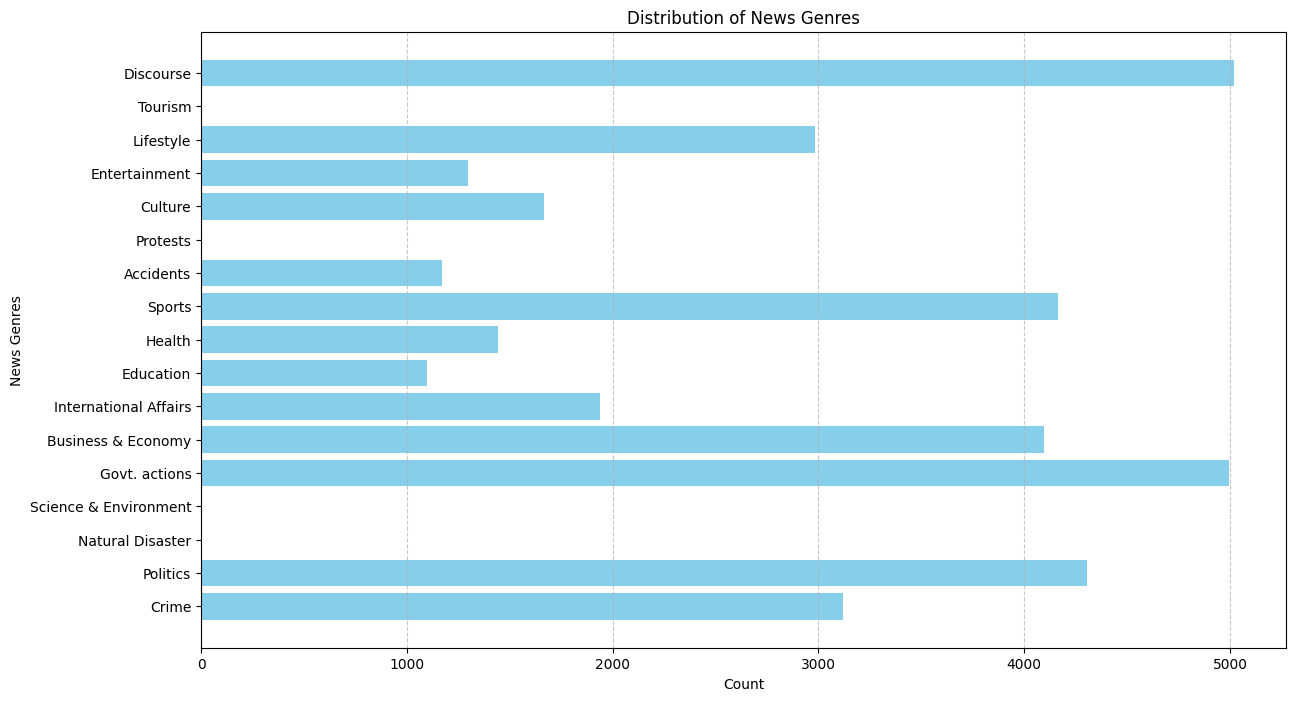

In [47]:
import matplotlib.pyplot as plt

# Data
genres = [
    'Crime', 'Politics', 'Natural Disaster', 'Science & Environment',
    'Govt. actions', 'Business & Economy', 'International Affairs',
    'Education', 'Health', 'Sports', 'Accidents', 'Protests',
    'Culture', 'Entertainment', 'Lifestyle', 'Tourism', 'Discourse'
]

counts = [
    3117, 4304, 0, 0, 4994, 4096, 1940,
    1096, 1444, 4163, 1171, 0,
    1665, 1296, 2981, 0, 5021
]

# Plotting
plt.figure(figsize=(14, 8))
plt.barh(genres, counts, color='skyblue')
plt.xlabel('Count')
plt.ylabel('News Genres')
plt.title('Distribution of News Genres')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Display the plot
plt.show()
